In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import h5py
from sqlalchemy import create_engine
from sas7bdat import SAS7BDAT
mnist = 'data/mnist.csv'
seaslug = 'data/seaslug.txt'
titanic = 'data/titanic_sub.csv'

<class 'numpy.ndarray'>


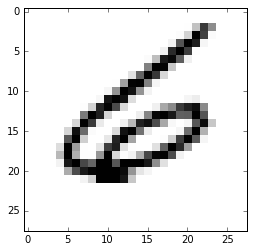

In [4]:
#NUMPY
#IMPORTANDO ARQUIVOS APENAS DE NUMEROS

# Load file as array: digits
digits = np.loadtxt(mnist, delimiter=',')

# Print datatype of digits
print(type(digits))

# Select and reshape a row
im = digits[21, 1:]
im_sq = np.reshape(im, (28, 28))

# Plot reshaped data (matplotlib.pyplot already loaded as plt)
plt.imshow(im_sq, cmap='Greys', interpolation='nearest')
plt.show()
plt.clf()

["b'Time'" "b'Percent'"]
[ 0.     0.357]


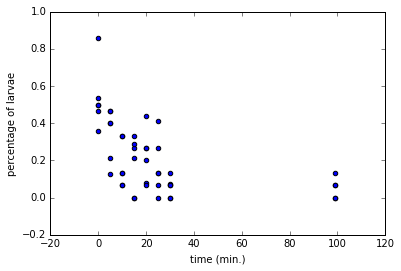

In [5]:
#NUMPY
#IMPORTANDO ARQUIVO COMO STRING

# Import file: data
#DA ERRO POIS NAO ESPERA DADOS MISTURADOS
data = np.loadtxt(seaslug, delimiter='\t', dtype=str)

# Print the first element of data
print(data[0])

# Import data as floats and skip the first row: data_float
data_float = np.loadtxt(seaslug, delimiter='\t', dtype=float, skiprows=1)

# Print the 10th element of data_float
print(data_float[9])

# Plot a scatterplot of the data
plt.scatter(data_float[:, 0], data_float[:, 1])
plt.xlabel('time (min.)')
plt.ylabel('percentage of larvae')
plt.show()
plt.clf()

In [6]:
#NUMPY
#LER DE UM CSV COM DADOS MISTURADOS
#por padrão, delimiter é ',', name=True e dtype=None

# Import file using np.recfromcsv: d
d = np.recfromcsv(titanic)

# Print out first three entries of d
print(d[:3])

[(1, 0, 3, b'male', 22.0, 1, 0, b'A/5 21171', 7.25, b'', b'S')
 (2, 1, 1, b'female', 38.0, 1, 0, b'PC 17599', 71.2833, b'C85', b'C')
 (3, 1, 3, b'female', 26.0, 0, 0, b'STON/O2. 3101282', 7.925, b'', b'S')]


   PassengerId  Survived  Pclass     Sex  Age  SibSp  Parch            Ticket  \
0            1         0       3    male   22      1      0         A/5 21171   
1            2         1       1  female   38      1      0          PC 17599   
2            3         1       3  female   26      0      0  STON/O2. 3101282   
3            4         1       1  female   35      1      0            113803   
4            5         0       3    male   35      0      0            373450   

      Fare Cabin Embarked  
0   7.2500   NaN        S  
1  71.2833   C85        C  
2   7.9250   NaN        S  
3  53.1000  C123        S  
4   8.0500   NaN        S  


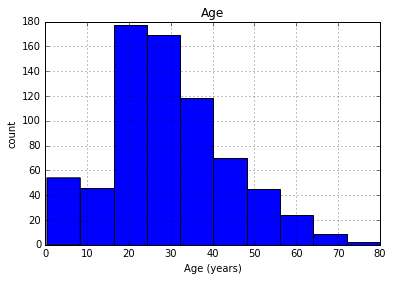

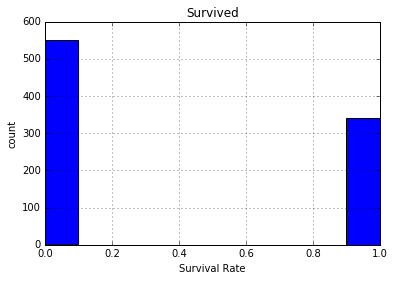

<class 'numpy.ndarray'>


In [7]:
#PANDAS
#APRENDENDO A LER AS PRIMEIRAS LINHAS DE UM ARQUIVO

# Read the file into a DataFrame: df
df = pd.read_csv(titanic, na_values='Nothing')

# View the head of the DataFrame
print(df.head())

# Plot 'Age' variable in a histogram
pd.DataFrame.hist(df[['Age']])
plt.xlabel('Age (years)')
plt.ylabel('count')
plt.show()
plt.clf()

# Plot 'Sex' variable in a histogram
pd.DataFrame.hist(df[['Survived']])
plt.xlabel('Survival Rate')
plt.ylabel('count')
plt.show()
plt.clf()

#ALTERNATIVAMENTE \/

# Read the first 5 rows of the file into a DataFrame: data
data = pd.read_csv(mnist, nrows=5, header=None)

# Build a numpy array from the DataFrame: data_array
data_array = data.values

# Print the datatype of data_array to the shell
print(type(data_array))

In [8]:
#get working directory
wd = os.getcwd()
os.listdir(wd)

['.ipynb_checkpoints',
 'data',
 'Empire State Game.ipynb',
 'Import Data from Web.ipynb',
 'Import Data.ipynb',
 'Iterate over Objects.ipynb',
 'winequality-red.csv',
 'Working With Large Data.ipynb']

In [10]:
# READ EXCEL FILES
# PRINT SHEET NAMES

# Assign spreadsheet filename: file
file = 'data/battledeath.xlsx'

# Load spreadsheet: xl
xl = pd.ExcelFile(file)

# Print sheet names
print(xl.sheet_names)

# Load a sheet into a DataFrame by name: df1
df1 = xl.parse('2004')

# Print the head of the DataFrame df1
print(df1.head())

# Load a sheet into a DataFrame by index: df2
df2 = xl.parse(0)

# Print the head of the DataFrame df2
print(df2.head())

# Parse the first sheet and rename the columns: df3
df3 = xl.parse(0, skiprows=[0], names=['Country', 'AAM due to War (2002)'])

# Print the head of the DataFrame df3
print(df3.head())

# Parse the first column of the second sheet and rename the column: df4
df4 = xl.parse(1, usecols=[0], skiprows=[0], names=['Country'])

# Print the head of the DataFrame df4
print(df4.head())

['2002', '2004']
  War(country)      2004
0  Afghanistan  9.451028
1      Albania  0.130354
2      Algeria  3.407277
3      Andorra  0.000000
4       Angola  2.597931
  War, age-adjusted mortality due to       2002
0                        Afghanistan  36.083990
1                            Albania   0.128908
2                            Algeria  18.314120
3                            Andorra   0.000000
4                             Angola  18.964560
               Country  AAM due to War (2002)
0              Albania               0.128908
1              Algeria              18.314120
2              Andorra               0.000000
3               Angola              18.964560
4  Antigua and Barbuda               0.000000
               Country
0              Albania
1              Algeria
2              Andorra
3               Angola
4  Antigua and Barbuda


   YEAR     P           S
0  1950  12.9  181.899994
1  1951  11.9  245.000000
2  1952  10.7  250.199997
3  1953  11.3  265.899994
4  1954  11.2  248.500000


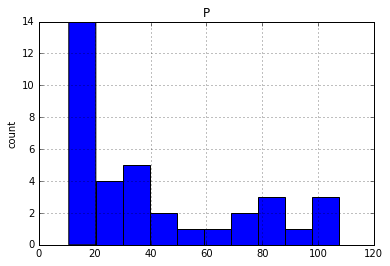

In [13]:

# Save file to a DataFrame: df_sas
with SAS7BDAT('data/sales.sas7bdat') as file:
    df_sas = SAS7BDAT.to_data_frame(file)

# Print head of DataFrame
print(df_sas.head())

# Plot histogram of DataFrame features (pandas and pyplot already imported)
pd.DataFrame.hist(df_sas[['P']])
plt.ylabel('count')
plt.show()
plt.clf()

In [23]:
#APRENDENDO A LER ARQUIVO STATA

# Load Stata file into a pandas DataFrame: df
df = pd.read_stata('data/disarea.dta', encoding='utf-8')

# Print the head of the DataFrame df
print(df.head())

# Plot histogram of one column of the DataFrame
pd.DataFrame.hist(df[['disa10']])
plt.xlabel('Extent of disease')
plt.ylabel('Number of coutries')
plt.show()
plt.clf()

TypeError: decode() argument 2 must be str, not None

<class 'h5py._hl.files.File'>
meta
quality
strain
Strain


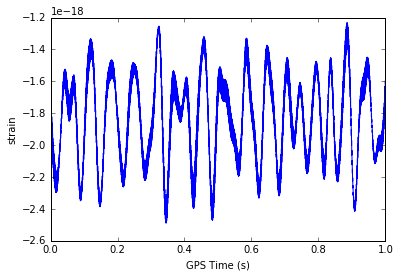

In [16]:
# APRENDENDO A LER ARQUIVOS HDF5

# Assign filename: file
file = 'data/LIGO_data.hdf5'

# Load file: data
data = h5py.File(file, 'r')

# Print the datatype of the loaded file
print(type(data))

# Print the keys of the file
for key in data.keys():
    print(key)
    
# Get the HDF5 group: group
group = data['strain']

# Check out keys of group
for key in group.keys():
    print(key)

# Set variable equal to time series data: strain
strain = data['strain']['Strain'].value

# Set number of time points to sample: num_samples
num_samples = 10000

# Set time vector
time = np.arange(0, 1, 1/num_samples)

# Plot data
plt.plot(time, strain[:num_samples])
plt.xlabel('GPS Time (s)')
plt.ylabel('strain')
plt.show()
plt.clf()

<class 'dict'>
dict_keys(['CYratioCyt', '__globals__', '__version__', 'rfpNuc', 'yfpNuc', 'yfpCyt', 'rfpCyt', '__header__', 'cfpCyt', 'cfpNuc'])
<class 'numpy.ndarray'>
(200, 137)


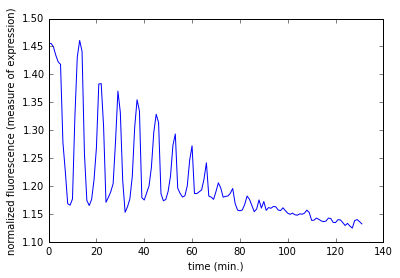

In [17]:
# APRENDENDO A IMPORTAR E TRABALHAR COM MATLAB FILES

# Import package
import scipy.io

# Load MATLAB file: mat
mat = scipy.io.loadmat('data/albeck_gene_expression.mat')

# Print the datatype type of mat
print(type(mat))

# Print the keys of the MATLAB dictionary
print(mat.keys())

# Print the type of the value corresponding to the key 'CYratioCyt'
print(type(mat['CYratioCyt']))

# Print the shape of the value corresponding to the key 'CYratioCyt'
print(np.shape(mat['CYratioCyt']))

# Subset the array and plot it
data = mat['CYratioCyt'][25, 5:]
fig = plt.figure()
plt.plot(data)
plt.xlabel('time (min.)')
plt.ylabel('normalized fluorescence (measure of expression)')
plt.show()
plt.clf()

In [18]:
# Create engine: engine
engine = create_engine('sqlite:///data/Chinook.sqlite')

# Print the table names to the shell
print(engine.table_names())

# Open engine connection and Perform query
con = engine.connect()
rs = con.execute('Select * from album')

# Save results of the query to DataFrame and Close connection
df = pd.DataFrame(rs.fetchall())
con.close()

# Print head of DataFrame df
print(df.head())

#==== Usando with, não precisa fechar a conexão ===#

with engine.connect() as con:
    rs = con.execute('Select LastName, Title from Employee')
    df = pd.DataFrame(rs.fetchmany(size=5))
    df.columns = rs.keys()

# Print the length of the DataFrame df
print(len(df))

# Print the head of the DataFrame df
print(df.head())


#==== Fazer a conexão de forma mais fácil  ===#
# Execute query and store records in DataFrame: df
df = pd.read_sql_query('Select * from Artist', engine)
print(df.head())


df = pd.read_sql_query('Select * from Employee where EmployeeId >= 6 order by BirthDate',engine)
print(df.head())

['Album', 'Artist', 'Customer', 'Employee', 'Genre', 'Invoice', 'InvoiceLine', 'MediaType', 'Playlist', 'PlaylistTrack', 'Track']
   0                                      1  2
0  1  For Those About To Rock We Salute You  1
1  2                      Balls to the Wall  2
2  3                      Restless and Wild  2
3  4                      Let There Be Rock  1
4  5                               Big Ones  3
5
  LastName                Title
0    Adams      General Manager
1  Edwards        Sales Manager
2  Peacock  Sales Support Agent
3     Park  Sales Support Agent
4  Johnson  Sales Support Agent
   ArtistId               Name
0         1              AC/DC
1         2             Accept
2         3          Aerosmith
3         4  Alanis Morissette
4         5    Alice In Chains
   EmployeeId  LastName FirstName       Title  ReportsTo            BirthDate  \
0           8  Callahan     Laura    IT Staff          6  1968-01-09 00:00:00   
1           7      King    Robert    IT Staff 